In [1]:
from numpy import loadtxt, log10
import matplotlib as mpl
mpl.use('pdf')
import matplotlib.pyplot as plt
%matplotlib inline

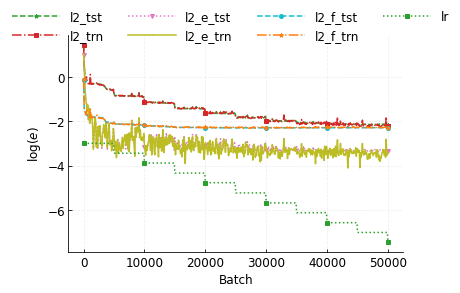

In [2]:
def get_ele(ls, idx):
    n = len(ls)
    return ls[idx%n]

def get_random_marker(i, marker_size=4, markevery=100):
    linestyle_list = ['solid', 'dashed', 'dashdot', 'dotted']
    marker_list    = ["o", "*", "s", "v", ","]
    color_list     = ["C1", "C2", "C3", "C6", "C8", "C9"]
    return dict(linestyle=get_ele(linestyle_list, i),
                marker=get_ele(marker_list, i),
                color=get_ele(color_list, i),
                markersize=marker_size,markevery=markevery)

energy_test = loadtxt("../test/test.e.out")
lcurve      = loadtxt("../train/lcurve.out")
ibatch      = lcurve[:,0]

params = {
        "font.size": 12,    
        "axes.titlesize":12,   
        "axes.labelsize": 12, 
        "legend.fontsize": 12, 
        "xtick.labelsize": 12, 
        "ytick.labelsize": 12, 
        "figure.subplot.wspace":0.2, 
        "figure.subplot.hspace":0.4,
        "axes.spines.right":False,
        "axes.spines.top":False, 
        "xtick.direction":'in',
        "ytick.direction":'in'
}

mpl.rcParams.update(params)

style_dict = {
    'l2_tst':get_random_marker(1),
    'l2_trn':get_random_marker(2),
    'l2_e_tst':get_random_marker(3),
    'l2_e_trn':get_random_marker(4),
    'l2_f_tst':get_random_marker(5),
    'l2_f_trn':get_random_marker(6),
    'lr':get_random_marker(7)
}

fig, ax = plt.subplots()
ax.plot(ibatch, log10(lcurve[:,1]), **style_dict['l2_tst'])
ax.plot(ibatch, log10(lcurve[:,2]), **style_dict['l2_trn'])
ax.plot(ibatch, log10(lcurve[:,3]), **style_dict['l2_e_tst'])
ax.plot(ibatch, log10(lcurve[:,4]), **style_dict['l2_e_trn'])
ax.plot(ibatch, log10(lcurve[:,5]), **style_dict['l2_f_tst'])
ax.plot(ibatch, log10(lcurve[:,6]), **style_dict['l2_f_trn'])
ax.plot(ibatch, log10(lcurve[:,7]), **style_dict['lr'])

props = {
      'xlabel': 'Batch', 
      'ylabel': r'log$(e)$'}
ax.set(**props)

ax.grid(linestyle="--", alpha=0.2)

fig.legend(('l2_tst','l2_trn','l2_e_tst','l2_e_trn','l2_f_tst','l2_f_trn','lr'),frameon=False, loc='upper center',ncol=4,handlelength=4)

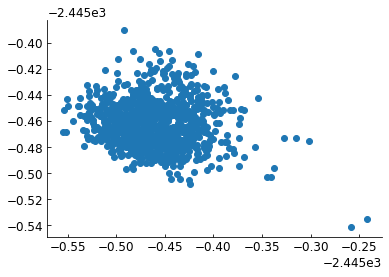

In [4]:
fig, axs = plt.subplots(1, 1)
axs.scatter(energy_test[:,0], energy_test[:,1])